# Introduction to Sport Analytics

---

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Import the Dataset

First of all, let's import the file `AthletesDataset.csv` and store its content into a `Pandas` `Dataframe`.

- This dataframe has rows and columns (like a table).
- Each column has a name (Name, Surname, Result, Wind, etc.).
- We can easily access columns by name, filter, sort, plot, etc.
- It's built with arrays, but it organizes them together in a structured way.

It's important to import the pandas library and then we can load the dataset:

```python
import pandas as pd
dataset = pd.read_csv("AthletesDataset.csv", delimiter=";", header=0)

In [2]:
dataset = pd.read_csv("AthletesDataset.csv", delimiter=",", header=0)
print(dataset.head(20))

       Name     Surname Result  Wind      Date   PB   Olympics
0   Oblique     Seville   9.82   0.9  01/06/24  NaN        NaN
1   Oblique     Seville   9.98   0.4  27/06/24  NaN        NaN
2   Oblique     Seville   9.83   0.4  28/06/24  NaN        NaN
3   Oblique     Seville   9.82   0.9  28/06/24   PB        NaN
4   Oblique     Seville   9.99   0.0  03/08/24  NaN       Heat
5   Oblique     Seville   9.81   0.7  04/08/24  NaN  Semifinal
6   Oblique     Seville   9.91   1.0  04/08/24  NaN      Final
7      Noah       Lyles  10.01   1.7  13/04/24  NaN        NaN
8      Noah       Lyles   9.96   3.0  28/04/24  NaN        NaN
9      Noah       Lyles   9.85   0.9  01/06/24  NaN        NaN
10     Noah       Lyles   9.92   0.3  22/06/24  NaN        NaN
11     Noah       Lyles   9.80   3.0  23/06/24  NaN        NaN
12     Noah       Lyles   9.83   0.4  24/06/24  NaN        NaN
13     Noah       Lyles   9.81  -0.3  20/07/24   PB        NaN
14     Noah       Lyles  10.04  -0.2  03/08/24  NaN    

## Data Cleaning

We want to delete rows in the dataset where the “Result” or “Wind” column does not contain a decimal point (i.e., they have something like DQ, DNS, NWI...).

In [3]:
def data_cleaning(df):
    def is_float(value):
        try:
            float(value)
            return True
        except:
            return False

    # Keep only rows where both 'Result' and 'Wind' are floats
    df_cleaned = df[df['Result'].apply(is_float) & df['Wind'].apply(is_float)]
    return df_cleaned

In [4]:
dataset = data_cleaning(dataset)
print(dataset.head(20))

       Name     Surname Result  Wind      Date   PB   Olympics
0   Oblique     Seville   9.82   0.9  01/06/24  NaN        NaN
1   Oblique     Seville   9.98   0.4  27/06/24  NaN        NaN
2   Oblique     Seville   9.83   0.4  28/06/24  NaN        NaN
3   Oblique     Seville   9.82   0.9  28/06/24   PB        NaN
4   Oblique     Seville   9.99   0.0  03/08/24  NaN       Heat
5   Oblique     Seville   9.81   0.7  04/08/24  NaN  Semifinal
6   Oblique     Seville   9.91   1.0  04/08/24  NaN      Final
7      Noah       Lyles  10.01   1.7  13/04/24  NaN        NaN
8      Noah       Lyles   9.96   3.0  28/04/24  NaN        NaN
9      Noah       Lyles   9.85   0.9  01/06/24  NaN        NaN
10     Noah       Lyles   9.92   0.3  22/06/24  NaN        NaN
11     Noah       Lyles   9.80   3.0  23/06/24  NaN        NaN
12     Noah       Lyles   9.83   0.4  24/06/24  NaN        NaN
13     Noah       Lyles   9.81  -0.3  20/07/24   PB        NaN
14     Noah       Lyles  10.04  -0.2  03/08/24  NaN    

## Data Normalization

We want to normalize the results in the dataset as they were all obtained will neutral wind (0.0 m/s).

In [5]:
dataset["Result"] = pd.to_numeric(dataset["Result"], errors='coerce')
dataset["Wind"] = pd.to_numeric(dataset["Wind"], errors='coerce')
dataset["Date"] = pd.to_datetime(dataset["Date"], format="%d/%m/%y", errors='coerce')

In [6]:
def normalize_wind_result(row):
    time = row["Result"]
    wind = row["Wind"]
    corrected_time = time - (0.0449 * wind) + (0.009459 * time * wind) - (0.0042 * wind ** 2)
    return corrected_time

# Apply the correction to the dataset
dataset["Time_Norm"] = dataset.apply(normalize_wind_result, axis=1)

# Round the corrected time to two decimal places
dataset["Time_Norm"] = dataset["Time_Norm"].round(2)

print(dataset.head(20))

       Name     Surname  Result  Wind       Date   PB   Olympics  Time_Norm
0   Oblique     Seville    9.82   0.9 2024-06-01  NaN        NaN       9.86
1   Oblique     Seville    9.98   0.4 2024-06-27  NaN        NaN      10.00
2   Oblique     Seville    9.83   0.4 2024-06-28  NaN        NaN       9.85
3   Oblique     Seville    9.82   0.9 2024-06-28   PB        NaN       9.86
4   Oblique     Seville    9.99   0.0 2024-08-03  NaN       Heat       9.99
5   Oblique     Seville    9.81   0.7 2024-08-04  NaN  Semifinal       9.84
6   Oblique     Seville    9.91   1.0 2024-08-04  NaN      Final       9.95
7      Noah       Lyles   10.01   1.7 2024-04-13  NaN        NaN      10.08
8      Noah       Lyles    9.96   3.0 2024-04-28  NaN        NaN      10.07
9      Noah       Lyles    9.85   0.9 2024-06-01  NaN        NaN       9.89
10     Noah       Lyles    9.92   0.3 2024-06-22  NaN        NaN       9.93
11     Noah       Lyles    9.80   3.0 2024-06-23  NaN        NaN       9.91
12     Noah 

## Introduction to Exploratory Data Analysis (EDA)

Let's visualize graphically some data from our dataset.

### Season Best (SB) for each Athlete

Best time for each athlete that has been done in 2024 season before the olympic semifinal (we want to predict that). It's different from the all time personal best (PB).

In [7]:
szn_data = dataset[(dataset['Date'] >= '2024-01-01') & (dataset['Date'] < '2024-08-04') & (dataset['Wind'] <= 2.0)]
SB = szn_data.groupby('Surname')['Result'].min().reset_index()
SB = SB.sort_values('Result')
SB.rename(columns={'Result': 'Season_Best'}, inplace=True)

features_table = SB.copy()
print(features_table)

        Surname  Season_Best
26     Thompson         9.77
19     Omanyala         9.79
16        Lyles         9.81
23      Seville         9.82
20   Richardson         9.86
24      Simbine         9.86
4      Bednarek         9.87
25       Tebogo         9.88
15       Kerley         9.88
18       Matadi         9.91
5         Blake         9.92
14       Jacobs         9.92
2          Ashe         9.94
12   Hinchliffe         9.95
10     Espinosa         9.96
1           Ali         9.96
9         Eseme         9.98
22   Sani Brown         9.99
0         Ajayi        10.00
8     De Grasse        10.00
7    Brathwaite        10.00
13       Hughes        10.00
21       Saminu        10.02
17  Maswanganyi        10.03
3       Azamati        10.05
11     Hartmann        10.06
6       Boonson        10.08


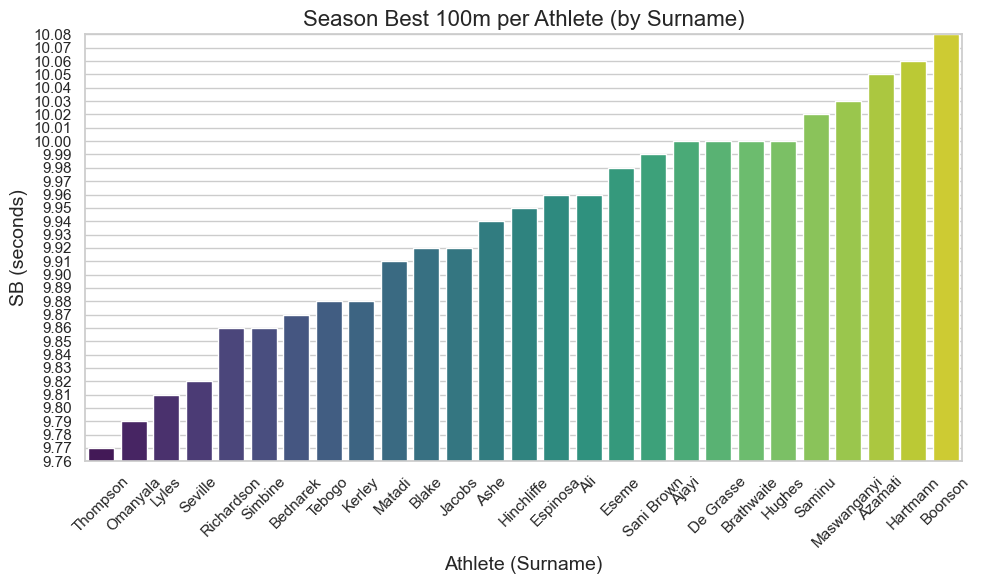

In [8]:
# Set seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=SB, x='Surname', y='Season_Best', hue='Surname', palette='viridis', legend=False)

# Add title and labels
plt.title('Season Best 100m per Athlete (by Surname)', fontsize=16)
plt.xlabel('Athlete (Surname)', fontsize=14)
plt.ylabel('SB (seconds)', fontsize=14)

# Set y-axis range and ticks (from 9.76 to 10.08, step 0.01)
plt.ylim(9.76, 10.08)
plt.yticks(np.arange(9.76, 10.08, 0.01))

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Normalized Season Best (NSB)

In [9]:
szn_data = dataset[(dataset['Date'] >= '2024-01-01') & (dataset['Date'] < '2024-08-04')]
Normalized_SB = szn_data.groupby('Surname')['Time_Norm'].min().reset_index()
Normalized_SB = Normalized_SB.sort_values('Time_Norm')
Normalized_SB.rename(columns={'Time_Norm': 'Normalized_SB'}, inplace=True)

features_table = features_table.merge(Normalized_SB, on='Surname', how='left')
print(features_table)

        Surname  Season_Best  Normalized_SB
0      Thompson         9.77           9.81
1      Omanyala         9.79           9.85
2         Lyles         9.81           9.80
3       Seville         9.82           9.85
4    Richardson         9.86           9.94
5       Simbine         9.86           9.85
6      Bednarek         9.87           9.89
7        Tebogo         9.88           9.87
8        Kerley         9.88           9.90
9        Matadi         9.91           9.96
10        Blake         9.92           9.95
11       Jacobs         9.92           9.98
12         Ashe         9.94          10.00
13   Hinchliffe         9.95           9.93
14     Espinosa         9.96           9.96
15          Ali         9.96          10.02
16        Eseme         9.98           9.99
17   Sani Brown         9.99          10.01
18        Ajayi        10.00          10.00
19    De Grasse        10.00          10.07
20   Brathwaite        10.00          10.05
21       Hughes        10.00    

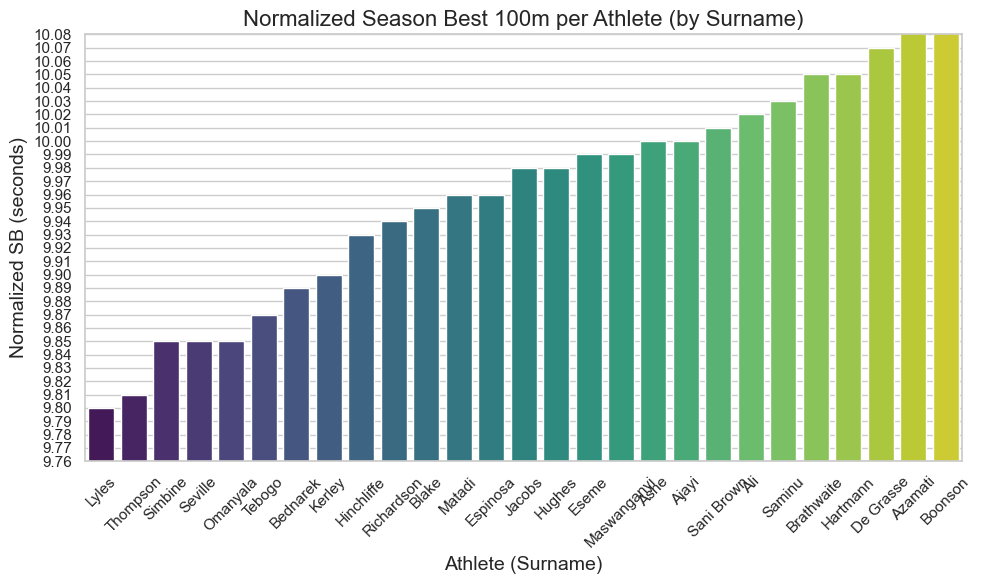

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=Normalized_SB, x='Surname', y='Normalized_SB', hue='Surname', palette='viridis', legend=False)
plt.title('Normalized Season Best 100m per Athlete (by Surname)', fontsize=16)
plt.xlabel('Athlete (Surname)', fontsize=14)
plt.ylabel('Normalized SB (seconds)', fontsize=14)
plt.ylim(9.76, 10.08)
plt.yticks(np.arange(9.76, 10.08, 0.01))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Mean of the results

Now, we want to create a feature with the mean of the 2024 results before the olympics of each athlete.

In [11]:
# Filter season data
szn_data = dataset[(dataset['Date'] >= '2024-01-01') & (dataset['Date'] < '2024-08-03')]

# Calculate mean time per athlete
Mean_Time = szn_data.groupby('Surname')['Time_Norm'].mean().reset_index()
Mean_Time = Mean_Time.sort_values('Time_Norm').round(2)
Mean_Time.rename(columns={'Time_Norm': 'Mean_Time'}, inplace=True)

# Merge into features_table
features_table = features_table.merge(Mean_Time, on='Surname', how='left')

print(features_table)

        Surname  Season_Best  Normalized_SB  Mean_Time
0      Thompson         9.77           9.81       9.86
1      Omanyala         9.79           9.85      10.02
2         Lyles         9.81           9.80       9.93
3       Seville         9.82           9.85       9.89
4    Richardson         9.86           9.94      10.16
5       Simbine         9.86           9.85      10.00
6      Bednarek         9.87           9.89       9.98
7        Tebogo         9.88           9.87      10.11
8        Kerley         9.88           9.90      10.07
9        Matadi         9.91           9.96      10.17
10        Blake         9.92           9.95      10.10
11       Jacobs         9.92           9.98      10.08
12         Ashe         9.94          10.00      10.12
13   Hinchliffe         9.95           9.93      10.11
14     Espinosa         9.96           9.96      10.27
15          Ali         9.96          10.02      10.11
16        Eseme         9.98           9.99      10.16
17   Sani 

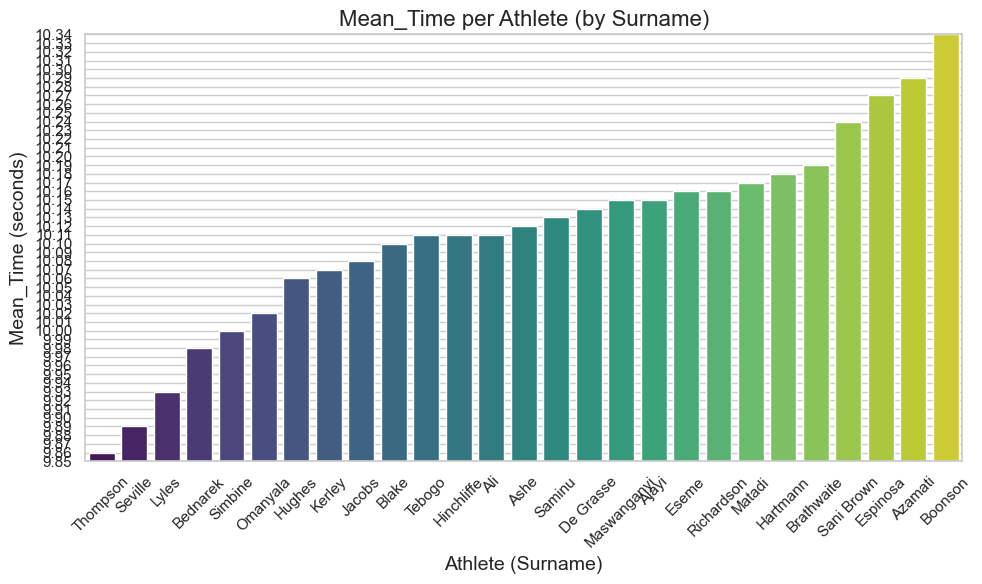

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=Mean_Time, x='Surname', y='Mean_Time', hue='Surname', palette='viridis', legend=False)

plt.title('Mean_Time per Athlete (by Surname)', fontsize=16)
plt.xlabel('Athlete (Surname)', fontsize=14)
plt.ylabel('Mean_Time (seconds)', fontsize=14)

plt.ylim(9.85, 10.34)
plt.yticks(np.arange(9.85, 10.34, 0.01))

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Difference from PB - SB

In [13]:
# Filter only rows where PB column is 'PB'
pb_data = dataset[dataset['PB'] == 'PB']
PB = pb_data.groupby('Surname')['Result'].min().reset_index()

PB.rename(columns={'Result': 'PB_Time'}, inplace=True)

# Merge PB into features_table
features_table = features_table.merge(PB, on='Surname', how='left')

# Calculate difference: Season_Best - PB_Time (positive if Season_Best is slower than PB, zero if equal)
features_table['SB_PB_Diff'] = (features_table['Season_Best'] - features_table['PB_Time']).round(2)

print(features_table)

        Surname  Season_Best  Normalized_SB  Mean_Time  PB_Time  SB_PB_Diff
0      Thompson         9.77           9.81       9.86     9.77        0.00
1      Omanyala         9.79           9.85      10.02     9.77        0.02
2         Lyles         9.81           9.80       9.93     9.81        0.00
3       Seville         9.82           9.85       9.89     9.82        0.00
4    Richardson         9.86           9.94      10.16     9.86        0.00
5       Simbine         9.86           9.85      10.00     9.84        0.02
6      Bednarek         9.87           9.89       9.98     9.87        0.00
7        Tebogo         9.88           9.87      10.11     9.88        0.00
8        Kerley         9.88           9.90      10.07     9.76        0.12
9        Matadi         9.91           9.96      10.17     9.91        0.00
10        Blake         9.92           9.95      10.10     9.89        0.03
11       Jacobs         9.92           9.98      10.08     9.80        0.12
12         A

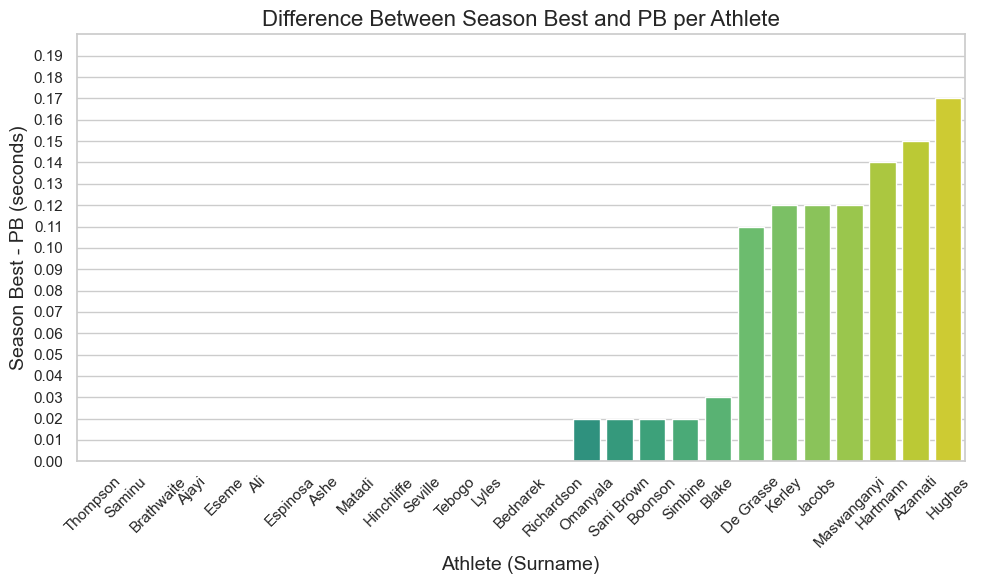

In [14]:
# Sort features_table by SB_PB_Diff for clean plotting
plot_data = features_table.sort_values('SB_PB_Diff')


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_data, x='Surname', y='SB_PB_Diff', hue='Surname', palette='viridis', legend=False)
plt.title('Difference Between Season Best and PB per Athlete', fontsize=16)
plt.xlabel('Athlete (Surname)', fontsize=14)
plt.ylabel('Season Best - PB (seconds)', fontsize=14)
plt.ylim(0, 0.20)
plt.yticks(np.arange(0, 0.20, 0.01))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Personal Best (PB)

In [15]:
pb_data = dataset[dataset["PB"] == "PB"]

personal_best = pb_data.groupby("Surname")["Result"].min().reset_index()
personal_best.rename(columns={"Result": "Personal_Best"}, inplace=True)

features_table = features_table.merge(personal_best, on="Surname", how="left")

print(features_table)

        Surname  Season_Best  Normalized_SB  Mean_Time  PB_Time  SB_PB_Diff  \
0      Thompson         9.77           9.81       9.86     9.77        0.00   
1      Omanyala         9.79           9.85      10.02     9.77        0.02   
2         Lyles         9.81           9.80       9.93     9.81        0.00   
3       Seville         9.82           9.85       9.89     9.82        0.00   
4    Richardson         9.86           9.94      10.16     9.86        0.00   
5       Simbine         9.86           9.85      10.00     9.84        0.02   
6      Bednarek         9.87           9.89       9.98     9.87        0.00   
7        Tebogo         9.88           9.87      10.11     9.88        0.00   
8        Kerley         9.88           9.90      10.07     9.76        0.12   
9        Matadi         9.91           9.96      10.17     9.91        0.00   
10        Blake         9.92           9.95      10.10     9.89        0.03   
11       Jacobs         9.92           9.98      10.

### Most recent time before the Olympic heats

In [16]:
recent_data = dataset[dataset["Date"] < "2024-08-03"]
recent_data = recent_data.sort_values("Date")

recent_form = recent_data.groupby("Surname").tail(1)[["Surname", "Time_Norm"]].rename(columns={"Time_Norm": "Recent_Form"})
features_table = features_table.merge(recent_form, on="Surname", how="left")

print(features_table)

        Surname  Season_Best  Normalized_SB  Mean_Time  PB_Time  SB_PB_Diff  \
0      Thompson         9.77           9.81       9.86     9.77        0.00   
1      Omanyala         9.79           9.85      10.02     9.77        0.02   
2         Lyles         9.81           9.80       9.93     9.81        0.00   
3       Seville         9.82           9.85       9.89     9.82        0.00   
4    Richardson         9.86           9.94      10.16     9.86        0.00   
5       Simbine         9.86           9.85      10.00     9.84        0.02   
6      Bednarek         9.87           9.89       9.98     9.87        0.00   
7        Tebogo         9.88           9.87      10.11     9.88        0.00   
8        Kerley         9.88           9.90      10.07     9.76        0.12   
9        Matadi         9.91           9.96      10.17     9.91        0.00   
10        Blake         9.92           9.95      10.10     9.89        0.03   
11       Jacobs         9.92           9.98      10.

## Predicting the outcome of the Semifinals

In order to do that, we will use an Heuristic Ranking Model, a model that doesn't learn from data but that uses fixed rules and weights to make predictions instead.

In [17]:
# --- 1. Calculate the combined score (lower is better) ---
# The weights can be adjusted as needed
features_table["Score"] = (
    0.4 * features_table["Normalized_SB"] +
    0.3 * features_table["Mean_Time"] +
    0.3 * features_table["Recent_Form"]
)

# --- 2. Rank all athletes by score ---
ranked = features_table.sort_values("Score").reset_index(drop=True)

# Select the top 8 athletes with the lowest score as predicted finalists
qualified_names = ranked.head(8)["Surname"].tolist()

# --- 3. Use the full list as semifinalists obtaining the original order
semifinalists_names = dataset[dataset["Olympics"] == "Semifinal"]["Surname"].tolist()[:27]
semifinalists = (
    features_table[features_table["Surname"].isin(semifinalists_names)]
    .assign(OriginalOrder=lambda df: df["Surname"].apply(semifinalists_names.index))
    .sort_values("OriginalOrder")
    .reset_index(drop=True)
)

# --- 4. Print the 3 semifinals (3 groups of 9), sorted internally by score ---
for i in range(3):
    print(f"\nSemifinal {i+1}")
    group = semifinalists.iloc[i*9:(i+1)*9].sort_values("Score")
    for _, row in group.iterrows():
        q = " Q" if row["Surname"] in qualified_names else ""
        print(f"{row['Surname']} ({row['Score']:.3f}){q}")

# --- 5. Print the qualifieds ---
print("\nQualified for the final")
for _, row in ranked.head(8).iterrows():
    print(f"{row['Surname']} ({row['Score']:.3f})")


Semifinal 1
Lyles (9.839) Q
Seville (9.862) Q
Hinchliffe (9.990)
Ali (10.047)
Maswanganyi (10.059)
Ashe (10.069)
Eseme (10.080)
Brathwaite (10.155)
Azamati (10.199)

Semifinal 2
Simbine (9.895) Q
Bednarek (9.929) Q
Tebogo (9.942) Q
Blake (9.995)
Jacobs (10.010)
Matadi (10.023)
Ajayi (10.045)
Hartmann (10.098)
Espinosa (10.167)

Semifinal 3
Thompson (9.846) Q
Kerley (9.951) Q
Omanyala (9.961) Q
Hughes (10.004)
Richardson (10.036)
Saminu (10.060)
De Grasse (10.103)
Sani Brown (10.142)
Boonson (10.343)

Qualified for the final
Lyles (9.839)
Thompson (9.846)
Seville (9.862)
Simbine (9.895)
Bednarek (9.929)
Tebogo (9.942)
Kerley (9.951)
Omanyala (9.961)


### Semifinal real result (not normalized)

In [18]:
semifinal_times = dataset[dataset['Olympics'] == 'Semifinal'][['Surname', 'Result']]
semifinal_times.rename(columns={'Result': 'Semifinal_Time'}, inplace=True)
features_table = features_table.merge(semifinal_times, on='Surname', how='left')

print(features_table)

        Surname  Season_Best  Normalized_SB  Mean_Time  PB_Time  SB_PB_Diff  \
0      Thompson         9.77           9.81       9.86     9.77        0.00   
1      Omanyala         9.79           9.85      10.02     9.77        0.02   
2         Lyles         9.81           9.80       9.93     9.81        0.00   
3       Seville         9.82           9.85       9.89     9.82        0.00   
4    Richardson         9.86           9.94      10.16     9.86        0.00   
5       Simbine         9.86           9.85      10.00     9.84        0.02   
6      Bednarek         9.87           9.89       9.98     9.87        0.00   
7        Tebogo         9.88           9.87      10.11     9.88        0.00   
8        Kerley         9.88           9.90      10.07     9.76        0.12   
9        Matadi         9.91           9.96      10.17     9.91        0.00   
10        Blake         9.92           9.95      10.10     9.89        0.03   
11       Jacobs         9.92           9.98      10.

### Linear Regression

Predicting the final result using the predicted qualified athletes.

In [19]:
from sklearn.linear_model import LinearRegression

# --- 1. Predicted finalists ---
predicted_finalists = ranked.head(8)["Surname"].tolist()

# --- 2. Test set: predicted finalists ---
final_input = features_table[features_table["Surname"].isin(predicted_finalists)].copy()
final_input = final_input.dropna(subset=["Semifinal_Time"])

X_test = final_input[["Season_Best", "Normalized_SB", "Mean_Time", "Semifinal_Time"]]

# --- 3. Training set: all the non finalist athletes ---
non_finalists = features_table[~features_table["Surname"].isin(predicted_finalists)].copy()
non_finalists = non_finalists.dropna(subset=["Semifinal_Time"])  # For training

X_train = non_finalists[["Season_Best", "Normalized_SB", "Mean_Time", "Semifinal_Time"]]
y_train = non_finalists["Semifinal_Time"]  # Semifinal used as proxy

# --- 4. Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
final_input["LR_Pred"] = lr_model.predict(X_test).round(3)

# --- Print results ---
print("\nPredicted Final Times — Linear Regression")
print("--------------------------------------------")
for _, row in final_input.sort_values("LR_Pred").iterrows():
    print(f"{row['Surname']:<15} {row['LR_Pred']:.2f} s")
    
# --- 5. Function to denormalize the wind to +1.0m/s ---
def denormalize_time(normal_time, wind=1.0):
    if wind == 1.0:
        return ((normal_time + 0.0491) / 1.009459)
    else:
        raise NotImplementedError("Only wind=1.0 is implemented directly")

final_input["LR_Pred_Wind+1.0"] = final_input["LR_Pred"].apply(denormalize_time).round(3)

# --- Print updated results ---
print("\nPredicted Final Times — Linear Regression (with Wind +1.0)")
print("-------------------------------------------------------------")
for _, row in final_input.sort_values("LR_Pred_Wind+1.0").iterrows():
    print(f"{row['Surname']:<15} {row['LR_Pred_Wind+1.0']:.2f} s")



Predicted Final Times — Linear Regression
--------------------------------------------
Thompson        9.80 s
Seville         9.81 s
Lyles           9.83 s
Kerley          9.84 s
Simbine         9.87 s
Tebogo          9.91 s
Bednarek        9.93 s
Omanyala        10.08 s

Predicted Final Times — Linear Regression (with Wind +1.0)
-------------------------------------------------------------
Thompson        9.76 s
Seville         9.77 s
Lyles           9.79 s
Kerley          9.80 s
Simbine         9.83 s
Tebogo          9.87 s
Bednarek        9.89 s
Omanyala        10.03 s


Predicting the final result using the actual qualified athletes.

In [20]:
# --- Real finalists ---
real_finalists = dataset[dataset["Olympics"] == "Final"]["Surname"].unique().tolist()

# --- 1. Test set: real finalists ---
final_input_real = features_table[features_table["Surname"].isin(real_finalists)].copy()
final_input_real = final_input_real.dropna(subset=["Semifinal_Time"])

X_test_real = final_input_real[["Season_Best", "Normalized_SB", "Mean_Time", "Semifinal_Time"]]

# --- 2. Training set: all the other athletes ---
non_finalists = features_table[~features_table["Surname"].isin(real_finalists)].copy()
non_finalists = non_finalists.dropna(subset=["Semifinal_Time"])

X_train = non_finalists[["Season_Best", "Normalized_SB", "Mean_Time", "Semifinal_Time"]]
y_train = non_finalists["Semifinal_Time"]

# --- 3. Linear Regression ---
lr_model_real = LinearRegression()
lr_model_real.fit(X_train, y_train)
final_input_real["LR_Pred"] = lr_model_real.predict(X_test_real).round(3)

# --- Print results ---
print("\nPredicted Final Times — Linear Regression (Real Finalists)")
print("-----------------------------------------------------------")
for _, row in final_input_real.sort_values("LR_Pred").iterrows():
    print(f"{row['Surname']:<15} {row['LR_Pred']:.2f} s")
    
# --- 4. Function to denormalize the wind to +1.0m/s ---
def denormalize_time(normal_time, wind=1.0):
    if wind == 1.0:
        return ((normal_time + 0.0491) / 1.009459)
    else:
        raise NotImplementedError("Only wind=1.0 is implemented directly")

final_input_real["LR_Pred_Wind+1.0"] = final_input_real["LR_Pred"].apply(denormalize_time).round(3)

# --- Print results ---
print("\nPredicted Final Times — Linear Regression (with Wind +1.0)")
print("-------------------------------------------------------------")
for _, row in final_input_real.sort_values("LR_Pred_Wind+1.0").iterrows():
    print(f"{row['Surname']:<15} {row['LR_Pred_Wind+1.0']:.2f} s")



Predicted Final Times — Linear Regression (Real Finalists)
-----------------------------------------------------------
Thompson        9.80 s
Seville         9.81 s
Lyles           9.83 s
Kerley          9.84 s
Simbine         9.87 s
Tebogo          9.91 s
Jacobs          9.92 s
Bednarek        9.93 s

Predicted Final Times — Linear Regression (with Wind +1.0)
-------------------------------------------------------------
Thompson        9.76 s
Seville         9.77 s
Lyles           9.79 s
Kerley          9.80 s
Simbine         9.83 s
Tebogo          9.87 s
Jacobs          9.88 s
Bednarek        9.89 s


Linear Regression builds a single formula that connects your input features (like Season Best, Normalized SB, Mean Time, and Semifinal Time) to the result. It assumes that as these values increase or decrease, the final time also changes in a smooth and predictable way.

In this case, these features are all numerical and have a clear relationship to performance, so Linear Regression can find a good trend. That’s why the model gives precise and varied predictions for each finalist. It’s especially good when your dataset is small and clean, like ours.

### Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

# --- Random Forest model ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
final_input["RF_Pred"] = rf_model.predict(X_test).round(3)

# --- Print results ---
print("\nPredicted Final Times — Random Forest")
print("-----------------------------------------")
for _, row in final_input.sort_values("RF_Pred").iterrows():
    print(f"{row['Surname']:<15} {row['RF_Pred']:.2f} s")


Predicted Final Times — Random Forest
-----------------------------------------
Tebogo          9.98 s
Thompson        9.98 s
Lyles           9.98 s
Seville         9.98 s
Simbine         9.98 s
Bednarek        9.98 s
Kerley          9.98 s
Omanyala        10.08 s


In this case it is using the denormalized times of before, but the result is similar with the normalized output.

Random Forest works differently: it splits the data into groups using decision trees and predicts by averaging results inside each group. This works well when we have lots of data and complex patterns.

But in this case, there are two problems:

- The training set is small, only about 19 athletes, so the trees don’t have much to learn from.
- Many athletes have very similar features, so the trees often group them together.

That’s why several finalists end up with the same predicted time, the model treats them as if they’re nearly identical and gives them the same average value.

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from itertools import combinations
import pandas as pd

# Predicted finalists
finalists = ranked.head(8)["Surname"].tolist()

# Splitting the data
non_finalists_df = features_table[~features_table["Surname"].isin(finalists)].dropna(subset=["Semifinal_Time"])
finalists_df = features_table[features_table["Surname"].isin(finalists)].dropna(subset=["Semifinal_Time"])

train_rows = []

for a, b in combinations(non_finalists_df.itertuples(), 2):
    # a - b
    row = {
        'delta_SB': a.Season_Best - b.Season_Best,
        'delta_NormSB': a.Normalized_SB - b.Normalized_SB,
        'delta_Mean': a.Mean_Time - b.Mean_Time,
        'delta_Semi': a.Semifinal_Time - b.Semifinal_Time,
        'label': 1 if a.Semifinal_Time < b.Semifinal_Time else 0
    }
    train_rows.append(row)

    # b - a
    row_rev = {
        'delta_SB': -row['delta_SB'],
        'delta_NormSB': -row['delta_NormSB'],
        'delta_Mean': -row['delta_Mean'],
        'delta_Semi': -row['delta_Semi'],
        'label': 1 if b.Semifinal_Time < a.Semifinal_Time else 0
    }
    train_rows.append(row_rev)

# Dataframe for training
train_df = pd.DataFrame(train_rows)
X_train = train_df[["delta_SB", "delta_NormSB", "delta_Mean", "delta_Semi"]]
y_train = train_df["label"]

clf = LogisticRegression()
clf.fit(X_train, y_train)

# Dictionary to count "wins"
win_counts = {name: 0 for name in finalists}

# All combinations of finalists in comparison
for a, b in combinations(finalists_df.itertuples(), 2):
    delta_features = [[
        a.Season_Best - b.Season_Best,
        a.Normalized_SB - b.Normalized_SB,
        a.Mean_Time - b.Mean_Time,
        a.Semifinal_Time - b.Semifinal_Time
    ]]

    prob = clf.predict_proba(delta_features)[0][1]  # Probability that a wins agains b

    if prob > 0.5:
        win_counts[a.Surname] += 1
    else:
        win_counts[b.Surname] += 1

# Sort on decreasing wins
final_ranking = sorted(win_counts.items(), key=lambda x: x[1], reverse=True)

print("\n🥇 Predicted Final Ranking (Pairwise Logistic Regression)")
print("---------------------------------------------------------")
for i, (name, wins) in enumerate(final_ranking, 1):
    print(f"{i}. {name:<15} ({wins} wins)")


🥇 Predicted Final Ranking (Pairwise Logistic Regression)
---------------------------------------------------------
1. Thompson        (7 wins)
2. Seville         (6 wins)
3. Lyles           (5 wins)
4. Kerley          (4 wins)
5. Simbine         (3 wins)
6. Bednarek        (2 wins)
7. Tebogo          (1 wins)
8. Omanyala        (0 wins)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X 

#### Introduction to Sport Analytics - Digicamp 2025

Lorenzo Galli - Università di Pisa & Università della Svizzera Italiana (USI)

Amedeo Zappulla - Università della Svizzera Italiana (USI)